# $\rho'$ analysis notes

### Data scheme

In [4]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import pandas as ps
import awkward

ccup9_2015_my_test = r"D:\GoogleDrive\Job\cern\Alice\analysis\dev\grid\selection\RhoPrime\macro\AnalysisResults.root"
ccup9_2015_my = r'D:\GoogleDrive\Job\cern\Alice\analysis\data\RhoPrime\2015\RhoPrime2015o.root'
events = uproot.open(ccup9_2015_my)['RhoPrimeCentral/events']
events.show()
print(events.name, events.title, events.numentries)

# mycache = uproot.ArrayCache(1024*1024 * 10)
data = events.arrays('*', namedecode="utf-8")
# data = events.lazyarrays('*', namedecode="utf-8")

# print(data.nTracks.sum())


RunNum                     (no streamer)              asdtype('>i4')
PeriodNumber               (no streamer)              asdtype('>u4')
OrbitNumber                (no streamer)              asdtype('>u4')
BunchCrossNumber           (no streamer)              asdtype('>u2')
Mass                       (no streamer)              asdtype('>f4')
Pt                         (no streamer)              asdtype('>f4')
Q                          (no streamer)              asdtype('>i2')
Rapidity                   (no streamer)              asdtype('>f4')
Phi                        (no streamer)              asdtype('>f4')
ZNAenergy                  (no streamer)              asdtype('>f4')
ZNCenergy                  (no streamer)              asdtype('>f4')
ZPAenergy                  (no streamer)              asdtype('>f4')
ZPCenergy                  (no streamer)              asdtype('>f4')
VtxX                       (no streamer)              asdtype('>f4')
VtxY                       (no str

### Run numbers from 2015o period

In [2]:
# print (np.unique(data['RunNum']))

runs = data.RunNum[GoodEvents]

counts = plt.hist(runs,bins=len(np.unique(runs)))

bins = []
counts = []

for run in np.unique(runs):
    bins.append(run)
    counts.append((data['RunNum'][GoodEvents] == run).sum())
    print(run, (data['RunNum'][GoodEvents] == run).sum())

plt.style. use(hep.style.ROOT)
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
fig.suptitle('4pr events by run', fontsize=32)
ax.bar(bins,counts,width=5 )
# ax.set_xticks(bins)
# ax.set_xticklabels(bins,rotation=90, rotation_mode="anchor", ha="right")
plt.show()



NameError: name 'GoodEvents' is not defined

## Selection criteria:

These criteria were applied on the selection stage:

Events:

    * Zero cumulative charge 
    * at least four tracks satisfy track selection criteria.
    
Tracks:

    * Has Point On inner or outer ITS Layer
    * dca1 < 2 and dca0 < (0.0182 + 0.0350 / TMath::Power(trk->Pt(), 1.01));

## Analysis criteria:

These criteria will apply for the selected data:

    * Was refitted by ITS    
    * Was refitted by TPC
    * numbers of TPC clusters more then 50
    * Number Of Sigma TPC Pion less then 3


In [180]:
select    =  data['T_ITSRefit']  * (np.abs(data['T_NumberOfSigmaITSPion']) < 3) * (data['T_ITSNCls'] >3) * data['IsCUP9'] \
            # * (data['T_TPCNCls'] < 50) #* (np.abs(data['T_NumberOfSigmaTPCPion']) < 3) # * data['T_TPCRefit'] 

selectTpc = data['T_TPCRefit'] * (data['T_TPCNCls'] > 50) * (np.abs(data['T_NumberOfSigmaTPCPion']) < 3)

def GetGoodEvents(TrackNum=4, ChargeEqualCondition=True, charge=0, WithGoodNTpcTracks=0):
    
#     GoodEvents = np.argwhere(select.counts==4) # get events with only 4 tracks
#     GoodEvents = GoodEvents[(np.argwhere(select[GoodEvents].sum().flatten()==TrackNum)).flatten()] # get events with only 4 good tracks
    
    GoodEvents = np.argwhere(select.sum()==TrackNum).flatten() # get events with 4 good tracks
    
    # at leass n tracks with tpc
    GoodEvents = np.intersect1d(GoodEvents,np.argwhere(selectTpc.sum().flatten() >= WithGoodNTpcTracks).flatten())
    
    # get events that have total charge from 4 tracks 
    if ChargeEqualCondition:
        GoodEvents = GoodEvents[np.argwhere(data['T_Q'][GoodEvents.flatten()].sum()==charge).flatten()].flatten()  # get good events witch total charge zero
    else:
        GoodEvents = GoodEvents[np.argwhere(data['T_Q'][GoodEvents.flatten()].sum()!=charge).flatten()].flatten() # get good events witch total charge non zero
    return GoodEvents

## Data validation

### Duplicates

Cause of some reasons AliESD could contains the same track few times.

![img](https://sun9-69.userapi.com/c855620/v855620379/242fba/B1cMRF7RoH0.jpg)


I would try to clean such data now till I don't have new data with pureITS mark and for the future cheks: 

In [227]:
def GetGoodEventsWODUplicates(goodev):
    
    for d in data['T_Px'][goodev]:
        d = data['T_Px'][108]
        N = len(d)
        pairWiseDiff = np.zeros((N,N))
    
        for n in range(N):
            pairWiseDiff[:,n] =  (d - d[n])**2
        return pairWiseDiff

        break
print(data['T_Px'][GoodEvents][108])
print()
print(GetGoodEventsWODUplicates(108))
# (0.37000424 + 0.34895775)**2


[-0.28252646  0.31766996 -0.32425556  0.3224601 ]

[[0.00000000e+00 5.37009835e-02 7.55319238e-01 5.06593525e-01
  7.55319238e-01 1.16049887e-06 6.35509789e-02 5.06593525e-01]
 [5.37009835e-02 0.00000000e+00 4.06223118e-01 2.30418354e-01
  4.06223118e-01 5.32028638e-02 4.14468028e-04 2.30418354e-01]
 [7.55319238e-01 4.06223118e-01 0.00000000e+00 2.47550011e-02
  0.00000000e+00 7.53447950e-01 3.80686343e-01 2.47550011e-02]
 [5.06593525e-01 2.30418354e-01 2.47550011e-02 0.00000000e+00
  2.47550011e-02 5.05061150e-01 2.11287916e-01 0.00000000e+00]
 [7.55319238e-01 4.06223118e-01 0.00000000e+00 2.47550011e-02
  0.00000000e+00 7.53447950e-01 3.80686343e-01 2.47550011e-02]
 [1.16049887e-06 5.32028638e-02 7.53447950e-01 5.05061150e-01
  7.53447950e-01 0.00000000e+00 6.30090162e-02 5.05061150e-01]
 [6.35509789e-02 4.14468028e-04 3.80686343e-01 2.11287916e-01
  3.80686343e-01 6.30090162e-02 0.00000000e+00 2.11287916e-01]
 [5.06593525e-01 2.30418354e-01 2.47550011e-02 0.00000000e+00
  2.47550011

## Pt

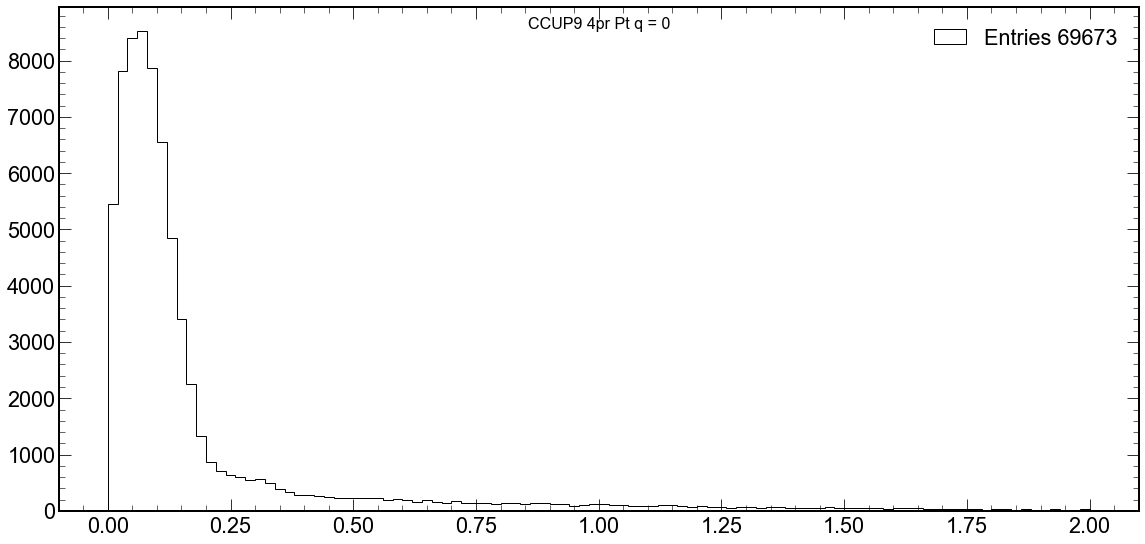

In [184]:
GoodEvents = GetGoodEvents(TrackNum=4, WithGoodNTpcTracks=0)

pxg = data['T_Px'][GoodEvents]
pyg = data['T_Py'][GoodEvents]
pzg = data['T_Pz'][GoodEvents]


pt = np.sqrt(pxg.sum()**2  + pyg.sum()**2)

counts, bins = np.histogram(pt,bins=100, range=(0,2))
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
fig.suptitle('CCUP9 4pr Pt q = 0', fontsize=16)
plt.style.use(hep.style.ROOT)
ax.hist(pt, bins=bins, histtype='step', color='black', label=f'Entries {np.sum(counts)}')
ax.legend()


## Mass

<ipython-input-177-f1fc34ed5384>:16: RuntimeWarning: invalid value encountered in sqrt
  Mass = np.sqrt(Energy**2 - pxg.sum()**2 - pyg.sum()**2 - pzg.sum()**2)[(pt>ptMin)*(pt<=ptMax)]


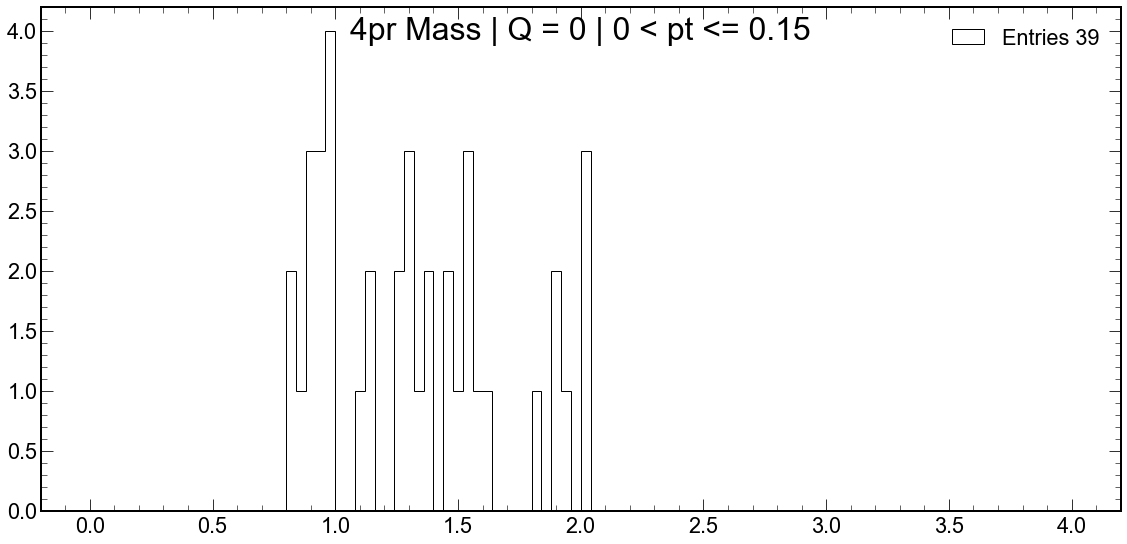

In [177]:
def GetMass(TrackNum=4, ChargeEqualCondition=True, charge=0, ptMin=0, ptMax=0.15, Draw=True):
    GoodEvents = GetGoodEvents(TrackNum=4, ChargeEqualCondition=True, charge=0)        
    pxg = data['T_Px'][GoodEvents]
    pyg = data['T_Py'][GoodEvents]
    pzg = data['T_Pz'][GoodEvents]
    massPion = np.full(pxg.shape[0], 0.140)
    pt = np.sqrt(pxg.sum()**2  + pyg.sum()**2)

    Energy0 = np.sqrt(massPion**2 + pxg[:,0]**2 + pyg[:,0]**2 + pzg[:,0]**2)
    Energy1 = np.sqrt(massPion**2 + pxg[:,1]**2 + pyg[:,1]**2 + pzg[:,1]**2)
    Energy2 = np.sqrt(massPion**2 + pxg[:,2]**2 + pyg[:,2]**2 + pzg[:,2]**2)
    Energy3 = np.sqrt(massPion**2 + pxg[:,3]**2 + pyg[:,3]**2 + pzg[:,3]**2)

    Energy = Energy0 + Energy1 + Energy2 + Energy3
    
    Mass = np.sqrt(Energy**2 - pxg.sum()**2 - pyg.sum()**2 - pzg.sum()**2)[(pt>ptMin)*(pt<=ptMax)]
    
    if Draw:
        fig = plt.figure(figsize=(15, 7))
        ax = fig.add_axes([0,0,1,1])
        if ChargeEqualCondition:
            fig.suptitle(f'4pr Mass | Q = 0 | {ptMin} < pt <= {ptMax}', fontsize=32)
        else:
            fig.suptitle(f'4pr Mass | Q != 0 | {ptMin} < pt <= {ptMax}', fontsize=32)
        plt.style.use(hep.style.ROOT)
        counts, bins = np.histogram(Mass, bins=100, range=(0,4))
        _ = ax.hist(Mass, bins=bins, color='black', histtype='step', label=f'Entries {np.sum(counts)}')
        ax.legend()
    else:
        return Mass
    
GetMass()

## Mass - pt - charge distirbution

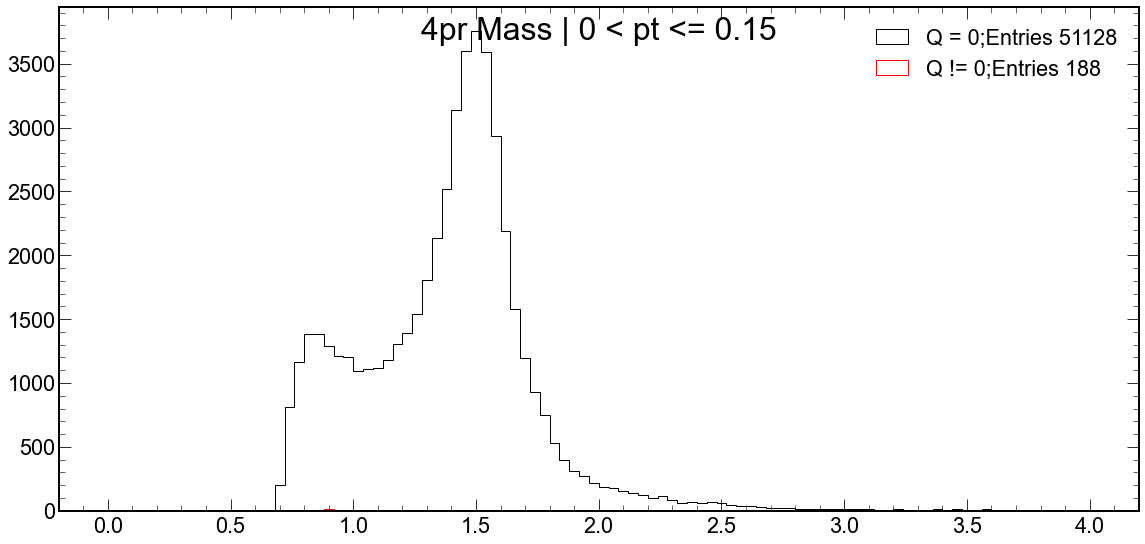

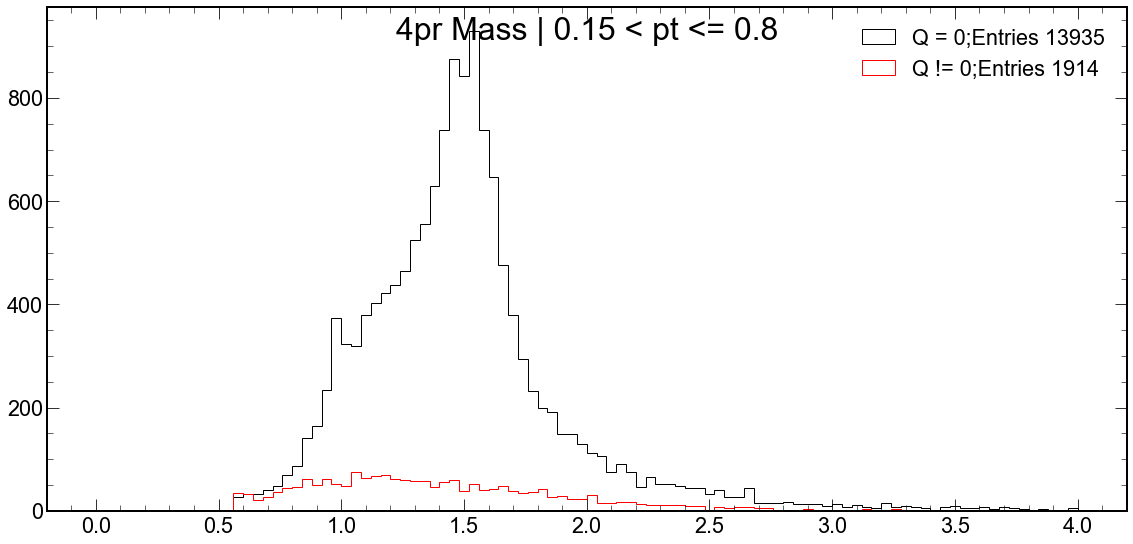

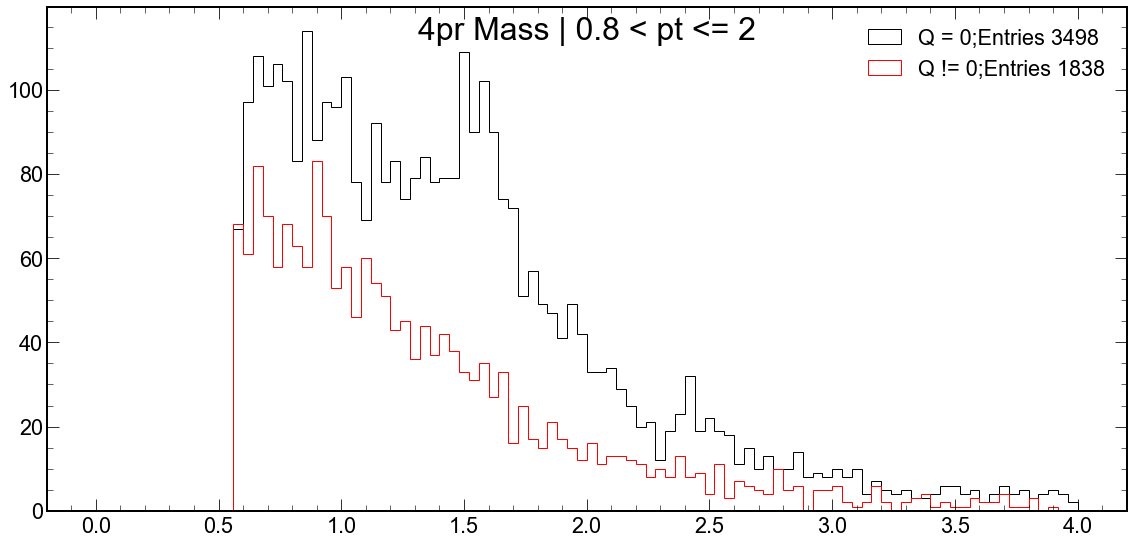

In [115]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
fig.suptitle(f'4pr Mass | {0} < pt <= {0.15}', fontsize=32)
plt.style.use(hep.style.ROOT)
counts, bins = np.histogram(GetMass(Draw=False), bins=100, range=(0,4))
_ = ax.hist(GetMass(Draw=False), bins=bins, color='black', histtype='step', label=f'Q = 0;Entries {np.sum(counts)}')
counts, bins = np.histogram(GetMass(ChargeEqualCondition=False,Draw=False), bins=100, range=(0,4))
_ = ax.hist(GetMass(ChargeEqualCondition=False,Draw=False), bins=bins, color='red', histtype='step', label=f'Q != 0;Entries {np.sum(counts)}')
ax.legend()

fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
fig.suptitle(f'4pr Mass | {0.15} < pt <= {0.8}', fontsize=32)
plt.style.use(hep.style.ROOT)
counts, bins = np.histogram(GetMass(Draw=False, ptMin=0.15, ptMax=0.8), bins=100, range=(0,4))
_ = ax.hist(GetMass(Draw=False,ptMin=0.15, ptMax=0.8), bins=bins, color='black', histtype='step', label=f'Q = 0;Entries {np.sum(counts)}')
counts, bins = np.histogram(GetMass(ChargeEqualCondition=False,Draw=False,ptMin=0.15, ptMax=0.8), bins=100, range=(0,4))
_ = ax.hist(GetMass(ChargeEqualCondition=False,Draw=False,ptMin=0.15, ptMax=0.8), bins=bins, color='red', histtype='step', label=f'Q != 0;Entries {np.sum(counts)}')
ax.legend()

fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
fig.suptitle(f'4pr Mass | {0.8} < pt <= {2}', fontsize=32)
plt.style.use(hep.style.ROOT)
counts, bins = np.histogram(GetMass(Draw=False, ptMin=0.8, ptMax=2), bins=100, range=(0,4))
_ = ax.hist(GetMass(Draw=False,ptMin=0.8, ptMax=2), bins=bins, color='black', histtype='step', label=f'Q = 0;Entries {np.sum(counts)}')
counts, bins = np.histogram(GetMass(ChargeEqualCondition=False,Draw=False,ptMin=0.8, ptMax=2), bins=100, range=(0,4))
_ = ax.hist(GetMass(ChargeEqualCondition=False,Draw=False,ptMin=0.8, ptMax=2), bins=bins, color='red', histtype='step', label=f'Q != 0;Entries {np.sum(counts)}')
ax.legend()



## $\rho -> \pi^+\pi^-2\pi^0$  vs $\rho -> \pi^+\pi^-\pi^+\pi^-$


In [60]:
GoodEvents = np.argwhere(select.counts==4)
GoodEvents
# get events that have total charge from 4 tracks 
# GoodEvents = GoodEvents[np.argwhere(data['IsCUP9'][GoodEvents.flatten()]==True).flatten()].flatten()
# GoodEvents = GoodEvents[np.argwhere(data['T_Q'][GoodEvents.flatten()].sum()==0).flatten()].flatten()
#(data['T_Q'][GoodEvents.flatten()]==1).sum()
data['T_Q'][1]         
# pxg = data['T_Px'][GoodEvents][select[GoodEvents]]
# pyg = data['T_Py'][GoodEvents][select[GoodEvents]]
# pzg = data['T_Pz'][GoodEvents][select[GoodEvents]]
# massPion = np.full(pxg.shape[0], 0.140)
# pt = np.sqrt(pxg.sum()**2  + pyg.sum()**2)

# Energy0 = np.sqrt(massPion**2 + pxg[:,0]**2 + pyg[:,0]**2 + pzg[:,0]**2)
# Energy1 = np.sqrt(massPion**2 + pxg[:,1]**2 + pyg[:,1]**2 + pzg[:,1]**2)
# Energy2 = np.sqrt(massPion**2 + pxg[:,2]**2 + pyg[:,2]**2 + pzg[:,2]**2)
# Energy3 = np.sqrt(massPion**2 + pxg[:,3]**2 + pyg[:,3]**2 + pzg[:,3]**2)
# Energy = Energy0 + Energy1 + Energy2 + Energy3
    
# Mass = np.sqrt(Energy**2 - pxg.sum()**2 - pyg.sum()**2 - pzg.sum()**2)[(pt>ptMin)*(pt<=ptMax)]
    

# fig = plt.figure(figsize=(15, 7))
# ax = fig.add_axes([0,0,1,1])
# fig.suptitle(f'4pr Mass | Q != 0 | {ptMin} < pt <= {ptMax}', fontsize=32)
# plt.style.use(hep.style.ROOT)
# counts, bins = np.histogram(Mass, bins=100, range=(0,4))
# _ = ax.hist(Mass, bins=bins, color='black', histtype='step', label=f'Entries {np.sum(counts)}')
# ax.legend()

array([-1,  1, -1,  1], dtype=int16)

## Energy losses

* all tracks

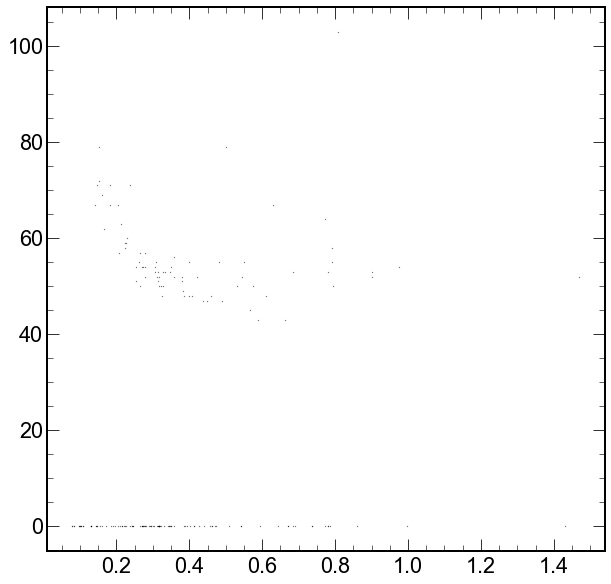

In [8]:
from scipy.stats import gaussian_kde

pt = np.sqrt(data['T_Px']**2 + data['T_Py']**2)#[(np.abs(data['T_NumberOfSigmaTPCPion']) < 3)]
dedx = data['TPCsignal'][(pt<2)].flatten()#[(np.abs(data['T_NumberOfSigmaTPCPion']) < 3)]
pt = pt[pt<2].flatten()
# z = gaussian_kde(pt)(dedx)

plt.style.use(hep.style.ROOT)
plt.scatter(pt.flatten(), dedx.flatten(),s=0.05, color='black')

* only selected events

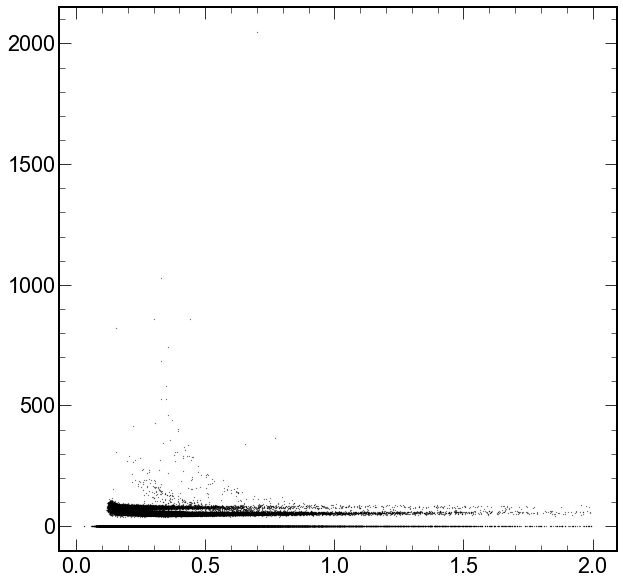

In [136]:
from scipy.stats import gaussian_kde

ptTracks = np.sqrt(pxg**2  + pyg**2).flatten()
dedx = data['TPCsignal'][GoodEvents].flatten()[ptTracks<2]
ptTracks = ptTracks[ptTracks<2]
# z = gaussian_kde(pt)(dedx)
plt.style.use(hep.style.ROOT)
plt.scatter(ptTracks.flatten(), dedx.flatten(),s=0.05, color = 'black')

In [187]:
import pandas as pd
# select    = ((data['T_HasPointOnITSLayer0']) + (data['T_HasPointOnITSLayer1'])) * \
#               data['T_ITSRefit']  * (np.abs(data['T_NumberOfSigmaITSPion']) < 3) * (data['T_ITSNCls'] >3) \
#               * data['T_TPCRefit']  * (data['T_TPCNCls'] > 50) * (np.abs(data['T_NumberOfSigmaTPCPion']) < 3) 

# good events with more than 4 tracks (108,  111, 1023, 1371, 2156, 2558, 2727, 2811, 3391, 3478)
print(GoodEvents[:10])
    
n = 4 
events.pandas.df(["T_Q", "T_P*", "T_HasPoint*", "*Cls", "*Refit", "*Pion", "RunNum"], entrystart=n, entrystop=n+1)           

[ 4  5  8  9 13 14 15 21 22 29]


T_Q       T_P     T_Phi      T_Px      T_Py      T_Pz  \
entry subentry                                                          
4     0          -1  0.441527  6.248244  0.370004 -0.012934  0.240573   
      1           1  0.475825  3.123752 -0.334759  0.005973  0.338098   
      2           1  0.495984  3.122774 -0.348958  0.006568  0.352399   
      3          -1  0.443257  6.248360  0.371442 -0.012941  0.241538   

                T_HasPointOnITSLayer0  T_HasPointOnITSLayer1  T_TPCNCls  \
entry subentry                                                            
4     0                          True                   True        148   
      1                          True                   True        119   
      2                          True                   True          0   
      3                          True                   True          0   

                T_ITSNCls  T_TPCRefit  T_ITSRefit  T_NumberOfSigmaITSPion  \
entry subentry                                                              
4     0                 5        True        True                0.846707   
      1                 6        True        True               -1.075162   
      2                 6       False        True               -1.358537   
      3                 5       False        True                1.065930   

                T_NumberOfSigmaTPCPion  RunNum  
entry subentry                                  
4     0                      -0.415917  245353  
      1                       1.050866  245353  
      2                    -999.000000  245353  
      3                    -999.000000  245353

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


(array([44., 24.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 1 Patch objects>)

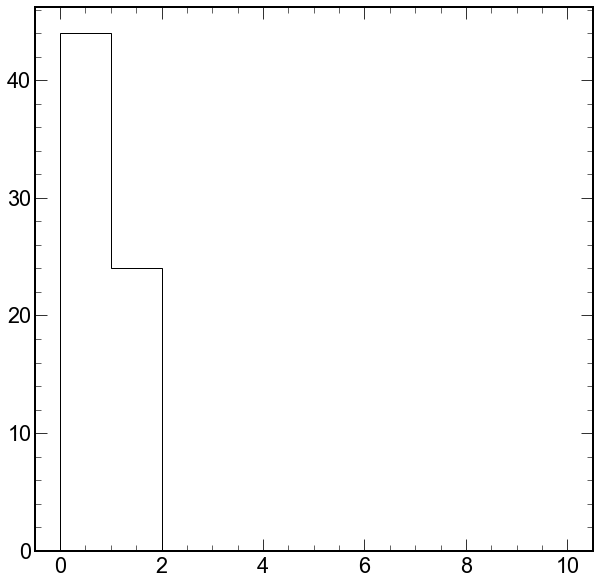

In [5]:
counts, bins = np.histogram(data['T_ITSsa'].flatten(),bins=10, range=(0,10))
plt.style.use(hep.style.ROOT)
plt.hist(data['T_ITSsa'].flatten(), bins=bins, histtype='step', color='black', label=f'Entries {np.sum(counts)}')



In [31]:
#data['T_Px'][GoodEvents]
a = np.array([[1,2,3,4], [1,1,2,3], [2,2,2,2], [5,6,7,7]])
px = awkward.fromiter([list(set(x)) for x in data['T_Px'][GoodEvents]])

In [138]:
select    =  data['T_ITSRefit']  * (np.abs(data['T_NumberOfSigmaITSPion']) < 3) * (data['T_ITSNCls'] >3) * data['IsCUP9'] \
            # * (data['T_TPCNCls'] < 50) #* (np.abs(data['T_NumberOfSigmaTPCPion']) < 3) # * data['T_TPCRefit'] 

selectTpc = data['T_TPCRefit'] * (data['T_TPCNCls'] > 50) * (np.abs(data['T_NumberOfSigmaTPCPion']) < 3)

GoodEvents = np.argwhere(select.sum()==4).flatten() # get events with 4 good tracks
#at leass n tracks with tpc
# n = 4
# EventsWithNTPC = np.argwhere(selectTpc.sum().flatten() >= n)
# GoodEvents = np.argwhere(select[np.argwhere(selectTpc[GoodEvents].sum().flatten() == n).flatten()].sum()==4).flatten()
# print(GoodEvents)
# GoodEvents = GoodEvents[(np.argwhere(select[GoodEvents].sum().flatten()==4)).flatten()]
    
# GoodEvents = GoodEvents[np.argwhere(data['T_Q'][GoodEvents.flatten()].sum()==0).flatten()].flatten()  # get good events witch total charge zero


In [168]:
# np.argwhere(select[np.argwhere(selectTpc[GoodEvents].sum().flatten() >= 4).flatten()])
# np.argwhere(select[np.argwhere(selectTpc[GoodEvents].sum().flatten() >= 4).flatten()])
# np.argwhere(select[np.argwhere(selectTpc[GoodEvents].sum().flatten() >= 4).flatten()].sum()==4)


array([     4,      5,      8, ..., 485137, 485140, 485142], dtype=int64)